Having various mobile phone features like battery power, 3G/4G enabled, wifi, bluetooth, ram etc we are predicting a price range of the mobile phone. The price range indicates how high the price is.

In this data:
* id: ID
* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
* dual_sim: Has dual sim support or not
* fc:Front Camera megapixels
* four_g: 4G-supported or not
* int_memory: Internal Memory in gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera megapixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in megabytes
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are talking
* three_g: 3G-supported or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not

Comparing 3 algorithms:
* KNN
* Decision tree
* Random forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [102]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [103]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [105]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Exploratory Data Analysis 

Let's consider how 'battery_power' is affected by 'price_range'.

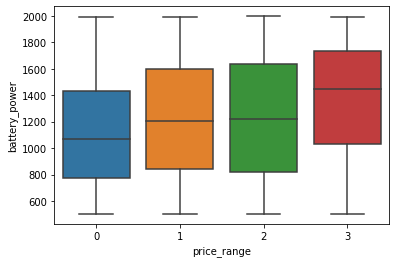

In [4]:
sns.boxplot(x='price_range',y='battery_power',data=df)

The histogram of the front and primary camera megapixels.

Text(0.5, 0, 'Megapixels')

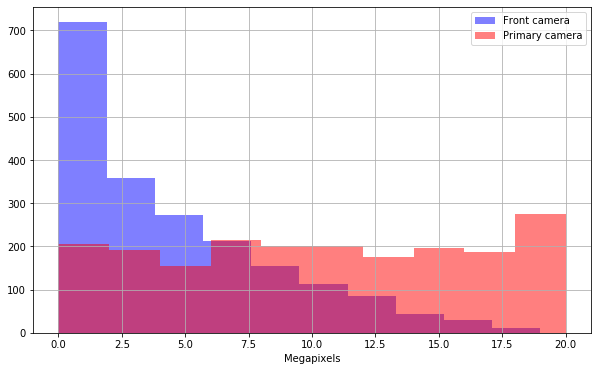

In [26]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('Megapixels')

The estimates and confidence intervals of the price range depend on number of cores.

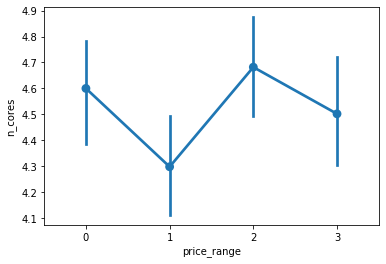

In [46]:
sns.pointplot(x='price_range',y='n_cores',data=df)

The correlation between 'ram' and 'price_range'.

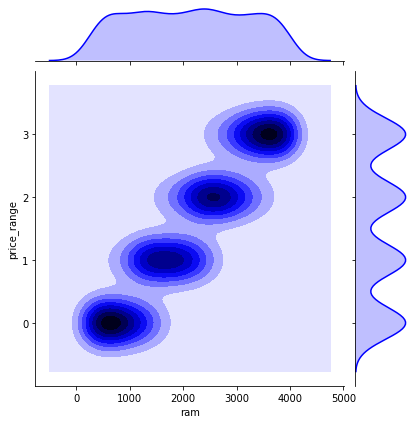

In [132]:
sns.jointplot(x='ram',y='price_range',data=df,color='blue',kind='kde')

Price range dependence on the Talking time.

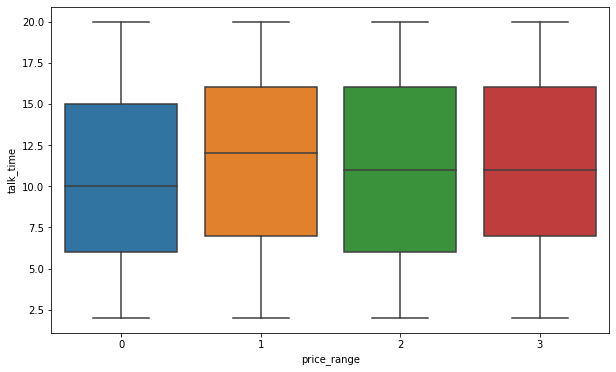

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x='price_range',y='talk_time',data=df)

Consider 3G-supported mobile phones in a pie-chart.

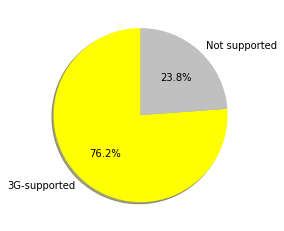

In [53]:
labels = ["3G-supported",'Not supported']
values = df_train['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['yellow', 'silver']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

And 4G-supported.

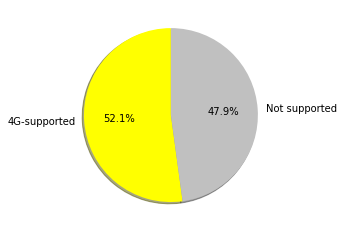

In [48]:
labels = ["4G-supported",'Not supported']
values = df_train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['yellow', 'silver']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

The correlation between features.

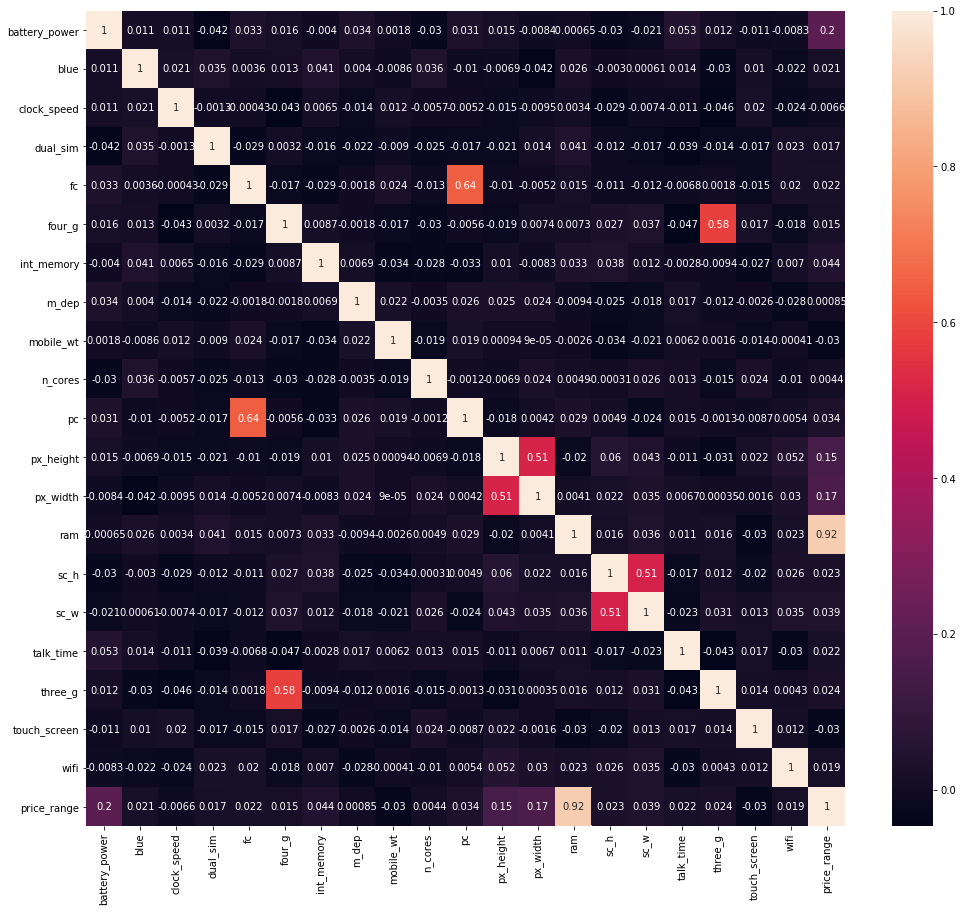

In [54]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True)

# K Nearest Neighbors Model

We need to standartize the variables.

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

In [71]:
scaler.fit(df_train.drop('price_range',axis=1))

StandardScaler()

Use the .transform() method to transform the features to a scaled version.

In [73]:
scaled_features = scaler.transform(df_train.drop('price_range',axis=1))

In [74]:
df_feat = pd.DataFrame(scaled_features,columns=df_train.columns[:-1])
df_feat.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


Use train_test_split to split your data into a training set and a testing set.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_train['price_range'],
                                                    test_size=0.30)

Create a KNN model instance with n_neighbors=1.

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_neighbors=1)

In [82]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [83]:
pred = knn.predict(X_test)

In [158]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
print(confusion_matrix(y_test,pred))

[[88 43 13  4]
 [28 51 50 16]
 [19 46 58 33]
 [ 3 18 49 81]]


In [85]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.64      0.59      0.62       148
           1       0.32      0.35      0.34       145
           2       0.34      0.37      0.36       156
           3       0.60      0.54      0.57       151

    accuracy                           0.46       600
   macro avg       0.48      0.46      0.47       600
weighted avg       0.48      0.46      0.47       600



Let's use the elbow method to pick a better K Value.

In [92]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

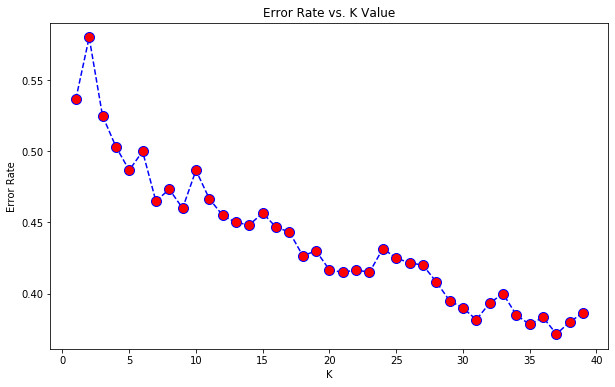

In [93]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [94]:
#WITH K=37
knn = KNeighborsClassifier(n_neighbors=37)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=37')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=37


[[118  27   3   0]
 [ 35  77  30   3]
 [  7  48  77  24]
 [  0   7  39 105]]


              precision    recall  f1-score   support

           0       0.74      0.80      0.77       148
           1       0.48      0.53      0.51       145
           2       0.52      0.49      0.50       156
           3       0.80      0.70      0.74       151

    accuracy                           0.63       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.63      0.63       600



The results are turned out to be better after retraining the model with K=37. 

# Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dtree = DecisionTreeClassifier()

In [111]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [112]:
predictions = dtree.predict(X_test)

In [113]:
from sklearn.metrics import classification_report,confusion_matrix

In [114]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       148
           1       0.78      0.79      0.78       145
           2       0.80      0.79      0.79       156
           3       0.87      0.89      0.88       151

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



In [117]:
print(confusion_matrix(y_test,predictions))

[[128  20   0   0]
 [ 16 114  15   0]
 [  0  13 123  20]
 [  0   0  16 135]]


# Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
rfc = RandomForestClassifier(n_estimators=200)

In [155]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [156]:
predict = rfc.predict(X_test)

In [157]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       148
           1       0.87      0.85      0.86       145
           2       0.81      0.83      0.82       156
           3       0.90      0.89      0.90       151

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



In [123]:
print(confusion_matrix(y_test,predict))

[[140   8   0   0]
 [  5 127  13   0]
 [  0  12 131  13]
 [  0   0  16 135]]


 Random Forest showed the best quality metrics in this problem.